In [11]:
import pandas as pd
import glob
import numpy as np
from sklearn.neighbors import BallTree
import lightgbm as lgb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [2]:
train_data = pd.DataFrame()
for f in tqdm(glob.glob('../ivanov.pub/data/dm4/open*.h5')):
    chunk = pd.read_hdf(f)
    train_data = train_data.append(chunk, ignore_index=True)

100%|██████████| 30/30 [00:20<00:00,  1.45it/s]


In [5]:
train_data.head()

,TX,TY,X,Y,Z,event_id,signal,data_ind
0,0.768548,0.490205,46626.425781,15151.117188,72408.0,188918.0,1.0,21
1,-0.051122,0.129603,53538.960938,20415.228516,54306.0,186416.0,1.0,21
2,-0.021628,0.124414,53160.718750,19411.798828,43962.0,186416.0,1.0,21
3,0.335952,0.588307,36330.363281,35048.679688,32325.0,193609.0,1.0,21
4,-0.076334,0.013219,37970.453125,48558.988281,47841.0,194587.0,1.0,21


In [3]:
test_data = pd.read_hdf('../ivanov.pub/data/dm4/test_close0.h5').append(pd.read_hdf('../ivanov.pub/data/dm4/test_close10.h5'), ignore_index=True)
print(test_data.shape)
test_data.head()

(7698899, 6)


,TX,TY,X,Y,Z,data_ind
0,0.087240,0.119438,86536.218750,62988.312500,56892.0,0
1,-0.380208,0.198382,93346.765625,58062.937500,14223.0,0
2,-0.348549,-0.099981,66129.578125,23038.673828,46548.0,0
3,0.585342,-0.126879,68825.523438,55186.625000,45255.0,0
4,0.038579,-0.131510,36366.941406,47564.878906,9051.0,0


In [8]:
train_data.data_ind.unique()

array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,   0, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 331, 332, 333, 334,
       335, 336, 337, 338, 339, 340, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 281, 282, 283, 284, 285, 286, 287, 288,
       289, 290, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [5]:
ind = train_data[train_data.data_ind == 21]

In [6]:
ind.shape

(11110, 8)

In [7]:
ind.event_id.unique()

array([188918., 186416., 193609., 194587., 195432., 187048., 189477.,
       186997., 152635., 183053., 195401., 196995., 199468.])

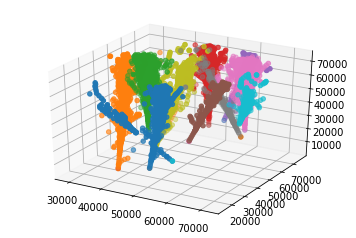

In [12]:
for event_id in ind.event_id.unique()[1:]:
    ev = ind[ind.event_id == event_id]
    ax = plt.gca(projection='3d')
    ax.scatter3D(ev.X, ev.Y, ev.Z)

In [13]:
event = ind[ind.event_id == 188918]

In [14]:
Z = event[event.Z == 64650]
Z_prev = event[event.Z == 63357]

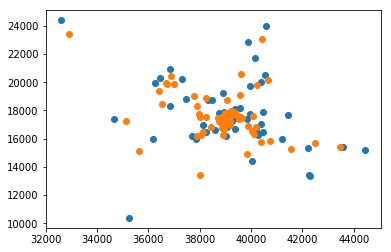

In [16]:
plt.scatter(Z.X, Z.Y)
plt.scatter(Z_prev.X, Z_prev.Y)

In [20]:
z = np.array(sorted(ind.Z.unique()))

In [21]:
z[1:] - z[:-1]

array([ 275.88671875,    3.28125   , 1013.83203125, 1293.        ,
       1293.        , 1293.        ,  196.69726562, 1096.30273438,
        174.49414062, 1118.50585938, 1293.        , 1293.        ,
       1293.        , 1293.        ,   77.39257812, 1215.60742188,
       1293.        ,   37.52148438, 1255.47851562,   14.31445312,
          5.44921875, 1269.61132812,    3.625     , 1293.        ,
       1247.2578125 ,    4.63085938,   41.11132812, 1293.        ,
       1209.26953125,   83.73046875, 1293.        , 1293.        ,
       1293.        , 1293.        , 1293.        , 1293.        ,
       1068.5859375 ,  224.4140625 , 1293.        , 1293.        ,
       1293.        , 1293.        , 1293.        , 1293.        ,
       1293.        , 1293.        , 1293.        , 1293.        ,
       1293.        , 1293.        , 1293.        , 1293.        ,
       1293.        , 1293.        , 1293.        , 1293.        ,
       1293.        , 1293.        , 1293.        , 1293.     

In [22]:
(values,counts) = np.unique(z[1:] - z[:-1], return_counts=True)
ind = np.argmax(counts)
dist = values[ind]
print(dist)

1293.0


In [20]:
np.unique(ind.event_id, return_counts=True)

(array([152635., 183053., 186416., 186997., 187048., 188918., 189477.,
        193609., 194587., 195401., 195432., 196995., 199468.],
       dtype=float32),
 array([ 269,  751,  871, 2267,  391, 2273,  342,  920, 1830,  261,  825,
          97,   13]))

In [23]:
columns = ['TX', 'TY', 'X', 'Y', 'Z']

In [24]:
cols_without_Z = columns[:-1]

In [25]:
def generate_pairs(df, metric):
    pairs = []
    for data_ind in tqdm(df.data_ind.unique()):
        ind = df[df.data_ind == data_ind]
        z_values = list(sorted(ind.Z.unique()))
        
        for z, z_next in zip(z_values, z_values[1:]):
            z = ind[ind.Z == z].copy()
            z_next = ind[ind.Z == z_next].copy()
            z[['TX', 'TY']] *= dist
            z_next[['TX', 'TY']] *= dist
            
            bt = BallTree(z_next[cols_without_Z], metric=metric)
            d, i = bt.query(z[cols_without_Z])
            data = z_next.iloc[i[:, 0]]
            
            for col in columns:
                z[col + '_pair'] = data[col].values
            if 'event_id' in data.columns:
                z['same_pair'] = data.event_id.values == z.event_id.values
            pairs.append(z)
            
        pairs.append(z_next)
        
    pairs = pd.concat(pairs)
    for col in columns:
        pairs['d' + col] = pairs[col].values - pairs[col + '_pair'].values
    return pairs

In [26]:
train_pairs = generate_pairs(train_data, 'minkowski')
train_pairs.head()

100%|██████████| 291/291 [02:40<00:00,  1.81it/s]
/home/lukanin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,TX,TX_pair,TY,TY_pair,X,X_pair,Y,Y_pair,Z,Z_pair,data_ind,event_id,same_pair,signal,dTX,dTY,dX,dY,dZ
9410,-120.490211,74.753609,444.966217,397.600922,38500.425781,40560.890625,25600.734375,47039.101562,3879.000000,4154.886719,21,193609.0,False,1.0,-195.243820,47.365295,-2060.464844,-21438.367188,-275.886719
10729,64.776703,74.753609,363.636444,397.600922,40566.082031,40560.890625,47068.250000,47039.101562,3879.000000,4154.886719,21,183053.0,True,1.0,-9.976906,-33.964478,5.191406,29.148438,-275.886719
4136,74.753609,-106.954178,397.600922,454.387695,40560.890625,38509.781250,47039.101562,25566.177734,4154.886719,4158.167969,21,183053.0,False,1.0,181.707794,-56.786774,2051.109375,21472.923828,-3.281250
6200,-106.954178,-117.631310,454.387695,444.702545,38509.781250,38386.769531,25566.177734,26033.638672,4158.167969,5172.000000,21,195432.0,False,1.0,10.677132,9.685150,123.011719,-467.460938,-1013.832031
3988,-117.631310,-114.252213,444.702545,441.472931,38386.769531,38273.128906,26033.638672,26465.855469,5172.000000,6465.000000,21,193609.0,True,1.0,-3.379097,3.229614,113.640625,-432.216797,-1293.000000


In [27]:
X_train = train_pairs[train_pairs.same_pair.notnull()]
y_train = X_train['same_pair'].astype(int)
X_train = X_train.drop(['event_id', 'signal', 'data_ind', 'same_pair'], axis=1)
X_train.head()

,TX,TX_pair,TY,TY_pair,X,X_pair,Y,Y_pair,Z,Z_pair,dTX,dTY,dX,dY,dZ
9410,-120.490211,74.753609,444.966217,397.600922,38500.425781,40560.890625,25600.734375,47039.101562,3879.000000,4154.886719,-195.243820,47.365295,-2060.464844,-21438.367188,-275.886719
10729,64.776703,74.753609,363.636444,397.600922,40566.082031,40560.890625,47068.250000,47039.101562,3879.000000,4154.886719,-9.976906,-33.964478,5.191406,29.148438,-275.886719
4136,74.753609,-106.954178,397.600922,454.387695,40560.890625,38509.781250,47039.101562,25566.177734,4154.886719,4158.167969,181.707794,-56.786774,2051.109375,21472.923828,-3.281250
6200,-106.954178,-117.631310,454.387695,444.702545,38509.781250,38386.769531,25566.177734,26033.638672,4158.167969,5172.000000,10.677132,9.685150,123.011719,-467.460938,-1013.832031
3988,-117.631310,-114.252213,444.702545,441.472931,38386.769531,38273.128906,26033.638672,26465.855469,5172.000000,6465.000000,-3.379097,3.229614,113.640625,-432.216797,-1293.000000


In [28]:
lgb_train = lgb.Dataset(X_train, y_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'max_depth': 15,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 4
}

In [30]:
num_round = 20
lgb.cv(params, lgb_train, num_round, nfold=5)

{'auc-mean': [0.9360419168171263,
  0.9459629647439616,
  0.9469070197332842,
  0.9484114507865897,
  0.9485582126996087,
  0.9485410227980562,
  0.9491523664631429,
  0.9501661200534889,
  0.9503340113520519,
  0.9504674203257659,
  0.9507355505069208,
  0.9506931054453969,
  0.9508888834850426,
  0.9508931219345303,
  0.9508635286832163,
  0.9513294521635265,
  0.9514030609516553,
  0.9518175200318442,
  0.9518977667524698,
  0.9498278119995467],
 'auc-stdv': [0.0006203368883412076,
  0.0009769691729005054,
  0.0006602733347053951,
  0.00048695005071242655,
  0.0004347015896929549,
  0.0004074524453614194,
  7.159013384017212e-05,
  0.00022502935106278606,
  0.00021562573626282856,
  0.0004257931543941137,
  0.0005017003209245992,
  0.0005195801415103468,
  0.0004541841951060927,
  0.0003706682567490245,
  0.00031894317201731513,
  0.0004017302666408957,
  0.00039633810601441853,
  0.0004276137969369693,
  0.0004221065135903712,
  0.00045794150612585933]}

In [32]:
num_round = 100
bst = lgb.train(params, lgb_train, num_round)

In [33]:
test_pairs = generate_pairs(test_data, 'minkowski')

100%|██████████| 11/11 [00:29<00:00,  2.67s/it]
/home/lukanin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



In [34]:
X_test = test_pairs.drop(['data_ind'], axis=1).reset_index(drop=True)
X_test.head()

,TX,TX_pair,TY,TY_pair,X,X_pair,Y,Y_pair,Z,Z_pair,dTX,dTY,dX,dY,dZ
0,-193.084152,-350.331818,623.975891,437.505890,37949.000000,38081.851562,24967.570312,24522.312500,0.0,1293.0,157.247665,186.470001,-132.851562,445.257812,-1293.0
1,-225.433212,-380.564331,-367.239899,458.562836,39335.953125,39409.578125,49094.968750,49534.917969,0.0,1293.0,155.131119,-825.802734,-73.625000,-439.949219,-1293.0
2,-288.543915,-166.982605,744.821838,638.900269,51992.125000,51851.539062,74045.695312,73873.390625,0.0,1293.0,-121.561310,105.921570,140.585938,172.304688,-1293.0
3,-131.043716,-486.173767,-389.968414,107.317078,29508.035156,29299.156250,67410.984375,67238.296875,0.0,1293.0,355.130066,-497.285492,208.878906,172.687500,-1293.0
4,-233.201782,135.409042,573.095337,775.318970,67685.781250,67272.015625,75164.359375,75664.359375,0.0,1293.0,-368.610840,-202.223633,413.765625,-500.000000,-1293.0


In [35]:
y_pred = bst.predict(X_test)

In [38]:
raw = pd.DataFrame({'id': test_pairs.index, 'prob': y_pred}).groupby('id')
agg = raw.aggregate(('mean', 'max', 'min'))['prob']

In [55]:
answer = pd.DataFrame(data={'id': agg.index, 'signal': agg['mean'].values})
answer.head()

,id,signal
0,0,0.12415
1,1,0.02826
2,2,0.22420
3,3,0.07140
4,4,0.02492


In [56]:
(answer.signal > .5).sum()

901447

In [65]:
answer.to_csv('submit.csv', index=False)